# HW 2 CS 454 CAN SÖLÖMBAZ

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from sklearn.metrics import confusion_matrix
import math
from sklearn.metrics import accuracy_score

In [2]:
train_data=pd.read_excel("C:/Users/mrt/Desktop/downloads/train1k.xlsx")
test_data=pd.read_excel("C:/Users/mrt/Desktop/downloads/test1k.xlsx")

In [173]:
train_data.head()

,label,image,image.1,image.2,image.3,image.4,image.5,image.6,image.7,image.8,...,image.774,image.775,image.776,image.777,image.778,image.779,image.780,image.781,image.782,image.783
0,6,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,6,1,0,0,4,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Nearest Mean Classifier

Assign input to digit who has the nearest mean 

gi(x) = Σ ( x(j)-m(ij) )^2 from j=1 to 784 


In [31]:
mean_vector=train_data.groupby(["label"]).mean()
mean_vector

,image,image.1,image.2,image.3,image.4,image.5,image.6,image.7,image.8,image.9,...,image.774,image.775,image.776,image.777,image.778,image.779,image.780,image.781,image.782,image.783
label,,,,,,,,,,,,,,,,,,,,,
0,0.03,0.34,0.25,0.03,0.14,0.18,0.16,0.05,1.73,2.17,...,0.23,0.25,0.21,0.13,0.07,0.25,0.0,0.00,0.00,0.0
1,0.03,0.00,0.06,0.03,0.00,0.06,0.16,0.00,2.10,1.49,...,0.05,0.06,0.13,0.08,0.01,0.06,0.0,0.00,0.00,0.0
2,0.33,0.44,0.81,0.40,0.50,0.60,0.53,0.84,2.34,3.17,...,0.18,0.03,0.08,0.14,0.13,0.00,0.0,0.00,0.00,0.0
3,0.60,0.59,0.56,0.36,0.52,0.57,0.66,0.22,2.32,2.43,...,0.50,0.30,0.30,0.53,0.46,0.09,0.0,0.00,0.00,0.0
4,0.72,0.25,0.38,0.11,0.15,0.31,0.28,0.39,1.44,1.65,...,1.28,0.50,0.25,0.54,0.62,0.45,0.0,0.00,0.00,0.0
5,0.43,0.11,0.07,0.20,0.18,0.23,0.12,0.23,1.74,1.88,...,0.40,0.47,0.37,0.40,0.16,0.09,0.0,0.00,0.00,0.0
6,0.03,0.00,0.08,0.14,0.00,0.12,0.04,0.00,1.66,3.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
7,0.49,0.24,0.42,0.32,0.54,0.41,0.53,0.33,1.08,1.23,...,1.89,0.68,0.33,0.59,0.62,0.79,0.0,0.00,0.00,0.0
8,0.17,0.22,0.04,0.24,0.06,0.17,0.15,0.14,2.50,1.40,...,0.70,0.21,0.45,0.86,0.43,0.20,0.0,0.00,0.00,0.0


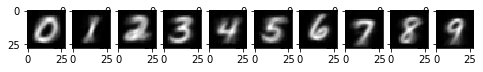

In [32]:
fig=plt.figure(figsize=(8, 8))

for i in range(len(mean_vector)):
    fig.add_subplot(1,10,i+1)
    plt.imshow(np.reshape(mean_vector.iloc[i].values,(28,28)), cmap='gray',interpolation='none')
plt.show()

In [4]:
def distance(point1, point2):
    sum_squared_dist = 0
    for i in range(len(point1)):
        sum_squared_dist += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_dist)

In [39]:
train_x=train_data.iloc[:,1:].values
test_x=test_data.iloc[:,1:].values
train_y=train_data.iloc[:,0].values
test_y=test_data.iloc[:,0].values
mean_vector=mean_vector.values

In [41]:
y_train=[]
for i in range(len(train_x)):
    min_dist=distance(train_x[i],mean_vector[0])
    y=0
    for j in range(len(mean_vector)):
        dist=distance(train_x[i],mean_vector[j])
        if dist<min_dist:
            min_dist=dist
            y=j
    y_train.append(y)        

In [43]:
y_test=[]
for i in range(len(test_x)):
    min_dist=distance(test_x[i],mean_vector[0])
    y=0
    for j in range(len(mean_vector)):
        dist=distance(test_x[i],mean_vector[j])
        if dist<min_dist:
            min_dist=dist
            y=j
    y_test.append(y)

In [44]:
y_true=train_data.iloc[:,0].array
label=[i for i in range(10)]

In [45]:
def conf_matrix(y_pred):
    labels = label
    cm = confusion_matrix(y_true, y_pred, labels=label)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticks(labels)
    ax.set_yticks(labels)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

[[91  0  1  0  0  3  3  1  1  0]
 [ 0 96  0  0  0  3  0  0  1  0]
 [ 2 14 69  3  3  1  1  4  1  2]
 [ 1  1  1 76  0 13  0  3  2  3]
 [ 0  2  0  0 84  0  2  0  0 12]
 [ 4  4  1 10  5 73  2  1  0  0]
 [ 1  5  0  0  4  6 84  0  0  0]
 [ 0  6  1  0  2  1  0 86  1  3]
 [ 0  8  2  5  0  8  1  0 73  3]
 [ 1  2  0  2  7  3  1  4  0 80]]


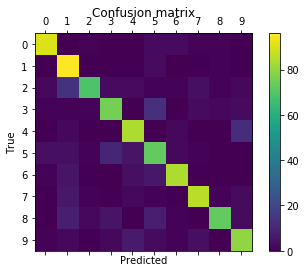

[[86  0  1  1  1  6  4  0  0  1]
 [ 0 95  0  0  0  5  0  0  0  0]
 [ 1 24 59  3  2  1  0  3  6  1]
 [ 0  3  1 59  0 31  0  3  1  2]
 [ 0  2  0  0 69  0  2  0  0 27]
 [ 3  4  1  9  3 67  0  4  2  7]
 [ 5  1  7  0 14  9 63  0  1  0]
 [ 0 10  3  0  2  1  0 73  0 11]
 [ 2  3  3  8  3  9  2  2 58 10]
 [ 0  1  0  2 15  0  0  4  2 76]]


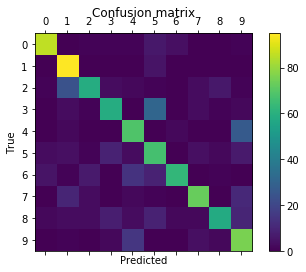

In [46]:
conf_matrix(y_train)
conf_matrix(y_test)

### K-nn Classifier

K-nn Classifier assigns the input to the class having most examples among k neighbors of the input.

P(Ci|x)=(p(x|Ci)P(Ci))/p(x) = ki/k

In [5]:
def knn_classifier(train_x, test_x, train_y, test_y):
    y_predicted=np.empty((1000,10),dtype=int)
    accuracy=[]

    for i in range(len(test_x)):          
        neighbors_dist=[]
        for j in range(len(train_x)):
            dist=distance(test_x[i],train_x[j])
            neighbors_dist.append((dist,train_y[j]))  
            
        knn=sorted(neighbors_dist, key=lambda x: x[0])[:10] #sort neighbors according to distances and select nearest 10
                
        for k in range(10):
            count=[0 for l in range(10)]
            for m in range(k+1):
                count[knn[m][1]]+=1
                
            y_predicted[i,k]=count.index(max(count)) #most occured digit is our prediction, prediction for k=1-10     
    
    y_predicted=pd.DataFrame(y_predicted)    
    
    for n in range(10):
        accuracy.append(accuracy_score(y_predicted.iloc[:,n], test_y))
    
    return accuracy, y_predicted.iloc[:,0] # y_predicted[:,0] --> predicted values for k=1

[accuracy, y_predicted_k1]=knn_classifier(train_x, test_x, train_y, test_y)  #for test data      

In [12]:
accuracy= [accuracy, y_predicted_k1][0]
y_predicted_k1= [accuracy, y_predicted_k1][1]

[[ 94   0   0   0   1   0   3   1   0   1]
 [  0 100   0   0   0   0   0   0   0   0]
 [  1   4  80   2   1   0   2   7   3   0]
 [  0   0   1  76   0  14   2   3   2   2]
 [  0   2   0   0  69   1   2   2   0  24]
 [  1   3   0   6   4  74   4   2   2   4]
 [  4   0   0   0   1   3  92   0   0   0]
 [  0   4   0   0   2   1   0  90   0   3]
 [  2   2   6   4   1   3   4   1  73   4]
 [  0   0   0   1   4   1   0   6   0  88]]


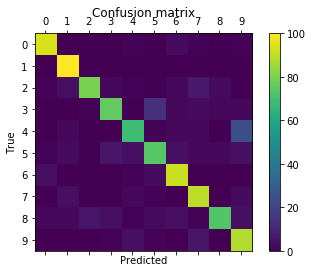

In [55]:
y_true=test_y
digits=[i for i in range(10)]
label=digits
conf_matrix(y_predicted_k1) # conf matrix for test set when k=1

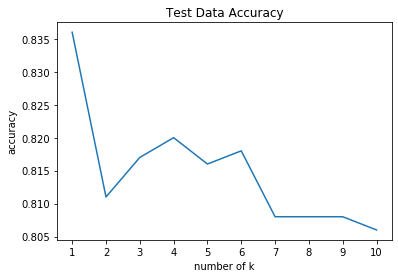

In [61]:
num_k=[i+1 for i in range(10)]
plt.xticks(num_k)
plt.xlabel("number of k")
plt.ylabel("accuracy")
plt.title("Test Data Accuracy")
plt.plot(num_k, accuracy)


In [52]:
train_acc,y_pred_k1_train = knn_classifier(train_x, train_x, train_y, train_y)

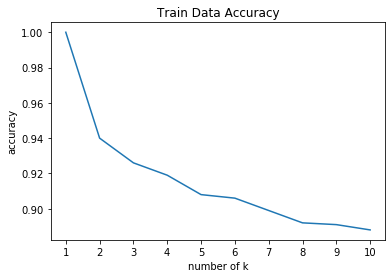

In [60]:
plt.title("Train Data Accuracy") 
plt.xticks(num_k)
plt.xlabel("number of k")
plt.ylabel("accuracy")
plt.plot(num_k, train_acc)